## Description:

    Diversity estimates



In [1]:

%load_ext rpy2.ipython

In [2]:
%%R
library(phyloseq)
library(ggplot2)
library(foreach)
library(doParallel)
library(gridExtra)
library(dplyr)
library(tidyr)
library(lme4)
library(lmerTest)
library(MuMIn)

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: iterators

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:gridExtra’:

    combine


  warnings.warn(x, RRuntimeWarning)
/opt/anacon

# Loading phyloseq object

In [3]:
%%R
F = file.path('/home/bryan/ERA/data/MiSeq/20170417_run1/phyloseq/ERA_thresh.rds')
physeq.Full = readRDS(F)

#rarefy to standard depth
set.seed(45)
phy.r = rarefy_even_depth(physeq.Full)

phy.r

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: ...

  warnings.warn(x, RRuntimeWarning)


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4592 taxa and 243 samples ]
sample_data() Sample Data:       [ 243 samples by 46 sample variables ]
tax_table()   Taxonomy Table:    [ 4592 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4592 tips and 4591 internal nodes ]


In [4]:
%%R
sample_sums(phy.r) %>% min

[1] 11543


In [5]:
%%R
colnames(sample_data(phy.r))

 [1] "X.sampleID"      "TubeID"          "ExtractionPlate" "PooledDNAPlate" 
 [5] "Sample.Well.ID"  "PrimerPlate"     "Primer.Number"   "Primer.Well.ID" 
 [9] "X"               "primerFwdLoc"    "primerRevLoc"    "fwd_barcode"    
[13] "rev_barcode"     "PlotID"          "TimePoint"       "Rep"            
[17] "Row"             "Pos"             "Fert"            "PlotIndex"      
[21] "Plant"           "Genotype"        "SeedTreatment"   "R_Year"         
[25] "ERA"             "BG_activity.g"   "BX_activity.g"   "CB_activity.g"  
[29] "LAP_activity.g"  "NAG_activity.g"  "Stage"           "kgdw_ha"        
[33] "FracN.leco"      "FracC.leco"      "kgN_ha"          "RGR"            
[37] "AGR"             "Nprod"           "NupR"            "d15N"           
[41] "X15N_AtPercent"  "FracN"           "FracN_fromSoil"  "FracN_fromFert" 
[45] "kgFertN_ha"      "kgSoilN_ha"     


### set ggplot theme

In [6]:
%%R
# set theme for ggplot

theme_pub = function (base_size = 11, base_family = "Helvetica") 
{
    theme_grey(base_size = base_size, base_family = base_family) %+replace% 
        theme(
            axis.line.x = element_line(size = .5),
            axis.line.y = element_line(size = .5),
            panel.background = element_rect(fill = "white", colour = NA), 
            panel.border = element_rect(fill = NA, color = "black", size = .5), 
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(), 
            strip.background = element_rect(fill = "grey85", 
                colour = "grey20"), 
            legend.key = element_rect(fill = "white", 
                colour = NA), complete = TRUE)
    }


In [7]:
%%R
# add planted variable

sd = sample_data(phy.r)
sd = mutate(sd, Planted = ifelse(Genotype == "Bare" | TimePoint == "T0", "Bare", "Rhizosphere"))
rownames(sd) = sd$X.sampleID
sd %>% head
sample_data(phy.r) = sd

# Alpha Diversity

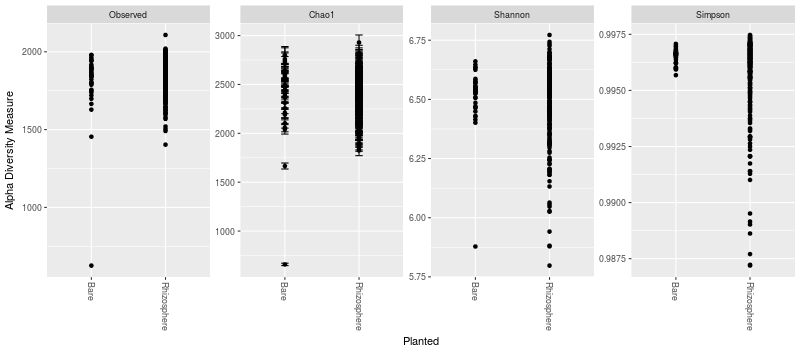

In [8]:
%%R -w 800 -h 350
alpha_meas = c("Observed", "Chao1", "Shannon", "Simpson")
(p <- plot_richness(phy.r, "Planted", measures=alpha_meas))

In [9]:
%%R
p$data %>% filter(variable == "Observed" & value < 1000)

     X.sampleID  TubeID ExtractionPlate PooledDNAPlate Sample.Well.ID
1 ERA-T0_2-3b_0 BD - 19            ERA3              C             H5
  PrimerPlate Primer.Number Primer.Well.ID  X primerFwdLoc primerRevLoc
1           3            20             D3 NA          3-D          3-3
  fwd_barcode rev_barcode PlotID TimePoint Rep Row Pos Fert PlotIndex Plant
1    CTGCGTGT    AGCTGCTA 2-3b_0        T0   2   3   b    0        90  Bare
  Genotype SeedTreatment R_Year ERA BG_activity.g BX_activity.g CB_activity.g
1     Bare                   NA  NA      58.50092      11.77377      11.74892
  LAP_activity.g NAG_activity.g    Stage kgdw_ha FracN.leco FracC.leco kgN_ha
1       103.3675       10.88638 Planting      NA         NA         NA     NA
  RGR AGR Nprod NupR d15N X15N_AtPercent FracN FracN_fromSoil FracN_fromFert
1  NA  NA    NA   NA   NA             NA    NA             NA             NA
  kgFertN_ha kgSoilN_ha Planted       samples variable value se
1         NA         NA    Bare ER

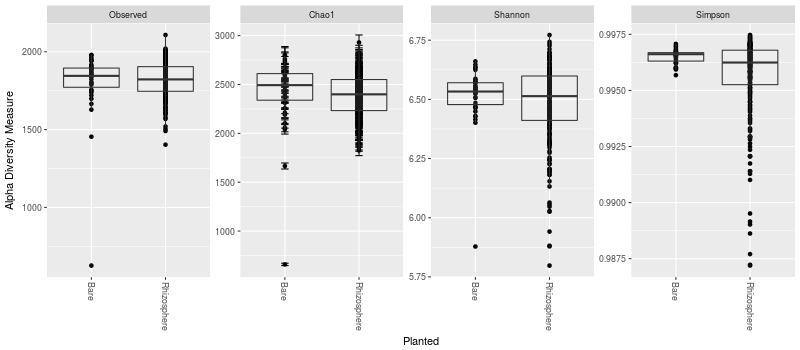

In [10]:
%%R -w 800 -h 350
alpha_meas = c("Observed", "Chao1", "Shannon", "Simpson")
p = plot_richness(phy.r, "Planted", measures=alpha_meas)
p = p + geom_boxplot(data=p$data, aes(x=Planted, y=value, color=NULL), alpha=0.1)
p$data$Fert = as.factor(p$data$Fert)
p

# Global plant vs bare soil:
    not a particularly meaningful analysis.  
    high level interactions in both metrics, particularly shannon's H
    Genotype is not used as a random effect in this model because it is confounded with the Planted/rhizosphere effect

In [11]:
%%R
tmp = p$data %>% filter(variable == "Chao1" & TimePoint != "T0" & SeedTreatment != "Untreated")

fit1 = lmer(value~ Fert*Planted*TimePoint + (1|Rep) + (1|Pos) + (1|Pos:Fert) + (1|Rep:Row:Pos), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: fixed-effect model matrix is rank deficient so dropping 4 columns / coefficients

  warnings.warn(x, RRuntimeWarning)


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                       Sum Sq Mean Sq NumDF  DenDF F.value  Pr(>F)  
Fert                    70855   35427     2  39.00 0.89200 0.41803  
Planted                 40325   40325     1  27.12 1.01530 0.32254  
TimePoint                6355    3178     2 168.94 0.08000 0.92315  
Fert:Planted             9037    4518     2 169.00 0.11376 0.89254  
Fert:TimePoint          12387    6193     2 167.53 0.15594 0.85574  
Planted:TimePoint       54628   27314     2 168.94 0.68772 0.50412  
Fert:Planted:TimePoint 222867  111433     2 167.53 2.80569 0.06331 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
       R2m        R2c 
0.05580737 0.27135099 


In [12]:
%%R
tmp = p$data %>% filter(variable == "Shannon" & TimePoint != "T0" & SeedTreatment != "Untreated")

fit1 = lmer(value~ Fert*Planted*TimePoint + (1|Rep) + (1|Pos) + (1|Pos:Fert)  + (1|Rep:Row:Pos), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                         Sum Sq  Mean Sq NumDF   DenDF F.value    Pr(>F)    
Fert                   0.110525 0.055262     2  37.368  3.9914 0.0268504 *  
Planted                0.038777 0.038777     1  26.221  2.8007 0.1061128    
TimePoint              0.101775 0.050888     2 165.392  3.6754 0.0274303 *  
Fert:Planted           0.069084 0.034542     2 164.797  2.4949 0.0856200 .  
Fert:TimePoint         0.045333 0.022667     2 163.328  1.6371 0.1977121    
Planted:TimePoint      0.268601 0.134301     2 165.392  9.7001 0.0001039 ***
Fert:Planted:TimePoint 0.102466 0.051233     2 163.328  3.7004 0.0268100 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
      R2m       R2c 
0.3894665 0.5136137 


## Graph three time points

In [13]:
%%R
Time = c("T1", "T2", "T3")
Stage = c("V6", "R1", "R3")
dS = cbind(Time, Stage) %>% as.data.frame()
df = p$data %>%
    filter(TimePoint != "T0" & SeedTreatment != "Untreated") %>%
    group_by(Genotype, Fert, R_Year, TimePoint, Planted, variable) %>%
    summarize(mValue = mean(value),
             seValue = sd(value)/sqrt(length(value)))  
df = left_join(df, dS, by = c("TimePoint" = "Time"))
df$Stage = factor(df$Stage, levels = c("V6", "R1", "R3"))
df %>% print(n = 210)

Source: local data frame [220 x 9]
Groups: Genotype, Fert, R_Year, TimePoint, Planted [?]

    Genotype   Fert R_Year TimePoint     Planted variable       mValue
      <fctr> <fctr>  <int>     <chr>       <chr>   <fctr>        <dbl>
1        322     85   1936        T2 Rhizosphere Observed 1802.2500000
2        322     85   1936        T2 Rhizosphere    Chao1 2352.3540781
3        322     85   1936        T2 Rhizosphere  Shannon    6.4992298
4        322     85   1936        T2 Rhizosphere  Simpson    0.9962397
5        330      0   1939        T1 Rhizosphere Observed 1847.5000000
6        330      0   1939        T1 Rhizosphere    Chao1 2363.4780824
7        330      0   1939        T1 Rhizosphere  Shannon    6.6109934
8        330      0   1939        T1 Rhizosphere  Simpson    0.9970424
9        330      0   1939        T3 Rhizosphere Observed 1890.2500000
10       330      0   1939        T3 Rhizosphere    Chao1 2485.2089074
11       330      0   1939        T3 Rhizosphere  Shannon

In [14]:
%%R
df$TimePoint %>% unique
df$Genotype %>% levels %>% print



 [1] "322"     "330"     "339"     "3394"    "3475"    "34M95"   "34N42"  
 [8] "3517"    "354"     "3541"    "3618"    "Bare"    "P1151HR"


In [15]:
%%R -w 800
df$Genotype = factor(df$Genotype, levels = c("Bare", "322",     "330" ,    "339", "354",  "3618", "3517",  
                                               "3541",  "3475",  "3394",   "34M95",   "34N42", "P1151HR") )


tmp = df %>% filter(variable %in% c("Chao1") & TimePoint == "T1") 
p1C = ggplot(tmp, aes(x = Genotype, y = mValue, color = as.factor(Fert), shape = Planted)) +
geom_point(position=position_dodge(width=.5))+
geom_errorbar(aes(ymin = mValue - seValue, ymax = mValue + seValue), position=position_dodge(width=.5))+
theme_pub() +
facet_grid(~Planted, scales = "free_x", space = "free_x" )+
xlab("Year of release") +
ylab("")+
theme(legend.position = "bottom")

tmp = df %>% filter(variable %in% c("Chao1") & TimePoint == "T2") 
p2C = ggplot(tmp, aes(x = Genotype, y = mValue, color = as.factor(Fert), shape = Planted)) +
geom_point(position=position_dodge(width=.5))+
geom_errorbar(aes(ymin = mValue - seValue, ymax = mValue + seValue), position=position_dodge(width=.5))+
theme_pub() +
facet_grid(~Planted, scales = "free_x", space = "free_x" )+
xlab("Year of release") +
ylab("")+
theme(legend.position = "bottom")

tmp = df %>% filter(variable %in% c("Chao1") & TimePoint == "T3") 
p3C = ggplot(tmp, aes(x = Genotype, y = mValue, color = as.factor(Fert), shape = Planted)) +
geom_point(position=position_dodge(width=.5))+
geom_errorbar(aes(ymin = mValue - seValue, ymax = mValue + seValue), position=position_dodge(width=.5))+
theme_pub() +
facet_grid(~Planted, scales = "free_x", space = "free_x" )+
xlab("Year of release") +
ylab("")+
theme(legend.position = "bottom")

# now shannon plots


tmp = df %>% filter(variable %in% c("Shannon") & TimePoint == "T1") 
p1S = ggplot(tmp, aes(x = Genotype, y = mValue, color = as.factor(Fert), shape = Planted)) +
geom_point(position=position_dodge(width=.5))+
geom_errorbar(aes(ymin = mValue - seValue, ymax = mValue + seValue), position=position_dodge(width=.5))+
theme_pub() +
facet_grid(~Planted, scales = "free_x", space = "free_x" )+
xlab("Year of release") +
ylab("")+
theme(legend.position = "bottom")

tmp = df %>% filter(variable %in% c("Shannon") & TimePoint == "T2") 
p2S= ggplot(tmp, aes(x = Genotype, y = mValue, color = as.factor(Fert), shape = Planted)) +
geom_point(position=position_dodge(width=.5))+
geom_errorbar(aes(ymin = mValue - seValue, ymax = mValue + seValue), position=position_dodge(width=.5))+
theme_pub() +
facet_grid(~Planted, scales = "free_x", space = "free_x" )+
xlab("Year of release") +
ylab("")+
theme(legend.position = "bottom")

tmp = df %>% filter(variable %in% c("Shannon") & TimePoint == "T3") 
p3S = ggplot(tmp, aes(x = Genotype, y = mValue, color = as.factor(Fert), shape = Planted)) +
geom_point(position=position_dodge(width=.5))+
geom_errorbar(aes(ymin = mValue - seValue, ymax = mValue + seValue), position=position_dodge(width=.5))+
theme_pub() +
facet_grid(~Planted, scales = "free_x", space = "free_x" )+
xlab("Year of release") +
ylab("")+
theme(legend.position = "bottom")

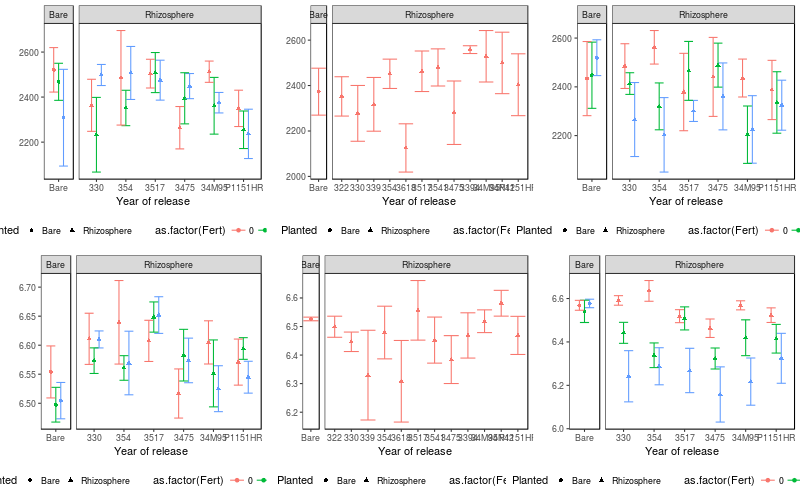

In [160]:
%%R -w 800 -h 500
grid.arrange(p1C, p2C, p3C, p1S, p2S, p3S, ncol = 3)

# Rhizosphere effect at T1
    No rhizosphere or fertilizer effect on estimated richness
    Shannon's H is lower in rhizosphere samples 

In [16]:
%%R
tmp = p$data %>% filter(variable == "Chao1" & TimePoint == "T1")

fit1 = lmer(value~ Fert*Planted + (1|Rep) + + (1|Pos) + (1|Pos:Fert) + (1|Rep:Row:Pos), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
             Sum Sq Mean Sq NumDF  DenDF F.value Pr(>F)
Fert          70317   35158     2 21.332 0.90380 0.4200
Planted       10045   10045     1 20.487 0.25822 0.6168
Fert:Planted 117807   58903     2 46.777 1.51419 0.2306
       R2m        R2c 
0.04370502 0.24212655 


In [17]:
%%R
tmp = p$data %>% filter(variable == "Shannon" & TimePoint == "T1")

fit1 = lmer(value~ Fert*Planted + (1|Rep) + (1|Pos) + (1|Pos:Fert) + (1|Rep:Row:Pos), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print
summary(fit1) %>% print

r.squaredGLMM(fit1) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq   Mean Sq NumDF  DenDF F.value  Pr(>F)  
Fert         0.0088662 0.0044331     2 21.332  1.0642 0.36261  
Planted      0.0225399 0.0225399     1 20.488  5.4111 0.03037 *
Fert:Planted 0.0045666 0.0022833     2 46.777  0.5481 0.58169  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: value ~ Fert * Planted + (1 | Rep) + (1 | Pos) + (1 | Pos:Fert) +  
    (1 | Rep:Row:Pos)
   Data: tmp

REML criterion at convergence: -170.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2841 -0.5587  0.1331  0.6158  1.9639 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 Rep:Row:Pos (Intercept) 1.403e-03 3.745e-02
 Pos:Fert    (Intercept) 0.000e+00 0.000e+00
 Pos         (Intercept) 3.367e-21 5.803e-11
 Rep         (Intercept

# Rhizosphere effect at T2

In [163]:
%%R
tmp = p$data %>% filter(variable == "Chao1" & TimePoint == "T2" & SeedTreatment != "Untreated")

fit1 = lmer(value~ Planted + (1|Rep), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
        Sum Sq Mean Sq NumDF DenDF  F.value Pr(>F)
Planted 1725.1  1725.1     1    47 0.043059 0.8365
         R2m          R2c 
0.0006482686 0.2321772813 


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
          Sum Sq  Mean Sq NumDF DenDF F.value Pr(>F)
Planted 0.017431 0.017431     1    47 0.67824 0.4144
       R2m        R2c 
0.01136907 0.14510588 


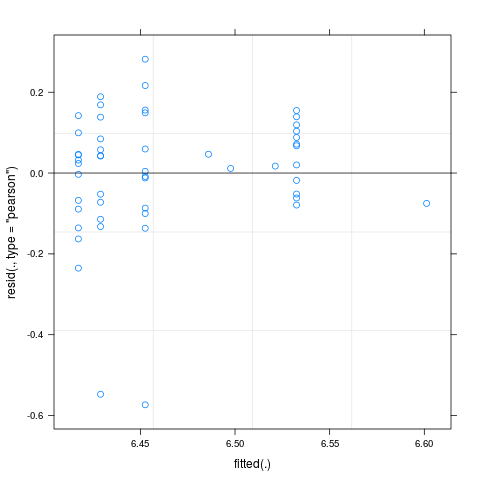

In [164]:
%%R
tmp = p$data %>% filter(variable == "Shannon" & TimePoint == "T2" & SeedTreatment != "Untreated")

fit1 = lmer(value~ Planted + (1|Rep), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print
plot(fit1)

# Rhizosphere effect at T3

In [18]:
%%R
tmp = p$data %>% filter(variable == "Chao1" & TimePoint == "T3")

fit1 = lmer(value~ Fert*Planted + (1|Rep) + (1|Pos) + (1|Pos:Fert) + (1|Rep:Row:Pos), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
             Sum Sq Mean Sq NumDF  DenDF F.value  Pr(>F)  
Fert           7620    3810     2 11.600  0.1326 0.87714  
Planted       98293   98293     1 20.119  3.4205 0.07914 .
Fert:Planted 113264   56632     2 46.310  1.9707 0.15087  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
       R2m        R2c 
0.09282152 0.54613090 


In [19]:
%%R
tmp = p$data %>% filter(variable == "Shannon" & TimePoint == "T3")

fit1 = lmer(value~ Fert*Planted + (1|Rep) + (1|Pos) + (1|Pos:Fert) + (1|Rep:Row:Pos), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
               Sum Sq  Mean Sq NumDF  DenDF F.value   Pr(>F)   
Fert         0.097411 0.048706     2 13.473  2.8959 0.089912 . 
Planted      0.234169 0.234169     1 20.375 13.9232 0.001284 **
Fert:Planted 0.158902 0.079451     2 46.402  4.7240 0.013572 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
      R2m       R2c 
0.4411949 0.5265628 


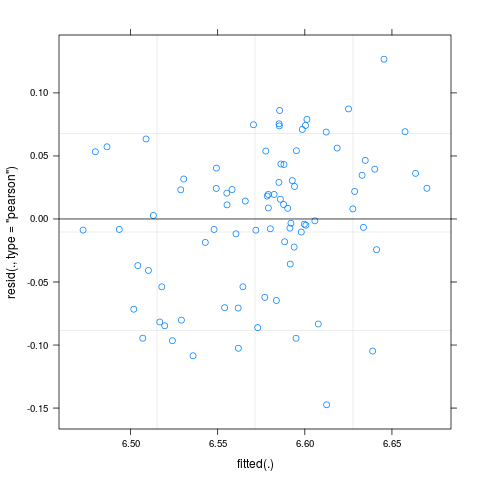

In [77]:
%%R
plot(fit1)

# Alpha diversity variation among plants

In [20]:
%%R
#sample_data(phy.p)$R_Year = as.factor(sample_data(phy.p)$R_Year)
phy.p = phy.r %>% subset_samples(TimePoint != "T0" & SeedTreatment == "Treated" & Genotype != "Bare")
#sample_data(phy.p)$Fert = as.factor(sample_data(phy.p))
alpha_meas = c("Observed", "Chao1", "Shannon", "Simpson")
p = plot_richness(phy.p, measures=alpha_meas)

p$data$Fert = as.factor(p$data$Fert)

* Center year for interpretation

In [21]:
%%R
p$data$R_Year.c = p$data$R_Year - 1935

## alpha  T1

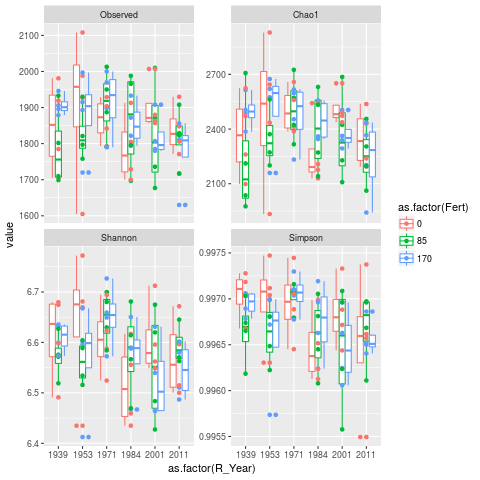

In [22]:
%%R
p.T1 = p$data %>% filter(TimePoint == "T1") 
ggplot(p.T1, aes(x = as.factor(R_Year), y = value, color = as.factor(Fert))) +
geom_boxplot() +
geom_point()+
facet_wrap(~variable, ncol = 2, scales = "free_y")

In [24]:
%%R
#test release year on alpha diversity
tmp = p.T1 %>% filter(variable == "Chao1")

fit1 = lmer(value~ Fert*R_Year.c + (1|Rep) + (1|Pos) + (1|Pos:Fert)  + (1|Genotype) + (1|Rep:Row:Pos), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print
rand(fit1) %>% print
# coef(fit1) %>% print
# confint(fit1) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
              Sum Sq Mean Sq NumDF  DenDF F.value  Pr(>F)  
Fert          148804   74402     2 31.539 2.70669 0.08225 .
R_Year.c       21560   21560     1  3.981 0.78433 0.42608  
Fert:R_Year.c 103426   51713     2 42.013 1.88128 0.16501  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
       R2m        R2c 
0.06895794 0.43820377 
Analysis of Random effects Table:
              Chi.sq Chi.DF p.value  
Rep         5.49e+00      1    0.02 *
Pos         0.00e+00      1    1.00  
Pos:Fert    4.55e-13      1    1.00  
Genotype    5.17e-01      1    0.47  
Rep:Row:Pos 6.64e-01      1    0.42  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [37]:
%%R
#test genotype on alpha diversity
tmp = p.T1 %>% filter(variable == "Chao1")

fit1 = lmer(value~ Fert*Genotype + (1|Rep) + (1|Pos) + (1|Pos:Fert)  + (1|Rep:Row:Pos), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print
rand(fit1) %>% print
# coef(fit1) %>% print
# confint(fit1) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
              Sum Sq Mean Sq NumDF  DenDF F.value Pr(>F)
Fert           33890   16945     2  4.283 0.63941 0.5715
Genotype      248527   49705     5 13.193 1.87559 0.1663
Fert:Genotype 280954   28095    10 32.392 1.06016 0.4192
      R2m       R2c 
0.1951138 0.5221609 
Analysis of Random effects Table:
            Chi.sq Chi.DF p.value  
Rep          5.662      1    0.02 *
Pos          0.030      1    0.86  
Pos:Fert     0.317      1    0.57  
Rep:Row:Pos  0.463      1    0.50  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [43]:
%%R
#test library effects on microbial diversity
tmp = p.T1 %>% filter(variable == "Shannon")

fit1 = lmer(value~ Fert*R_Year.c + (1|Rep) + (1|Pos) + (1|Pos:Fert) + (1|Genotype) + (1|Rep:Row:Pos), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print
rand(fit1) %>% print


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq   Mean Sq NumDF  DenDF F.value Pr(>F)
Fert          0.0061228 0.0030614     2 31.539 0.80392 0.4565
R_Year.c      0.0058647 0.0058647     1  3.956 1.54006 0.2831
Fert:R_Year.c 0.0088078 0.0044039     2 42.013 1.15646 0.3244
       R2m        R2c 
0.05365814 0.44829240 
Analysis of Random effects Table:
              Chi.sq Chi.DF p.value  
Rep         1.98e+00      1    0.16  
Pos         3.41e-13      1    1.00  
Pos:Fert    7.35e-12      1    1.00  
Genotype    2.25e-03      1    0.96  
Rep:Row:Pos 4.56e+00      1    0.03 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [44]:
%%R
#test genotype effects on microbial diversity
tmp = p.T1 %>% filter(variable == "Shannon")

fit1 = lmer(value~ Fert*Genotype + (1|Rep) + (1|Pos) + (1|Pos:Fert) + (1|Rep:Row:Pos), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print
rand(fit1) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq   Mean Sq NumDF   DenDF F.value Pr(>F)
Fert          0.001816 0.0009080     2  3.6463 0.25797 0.7856
Genotype      0.018505 0.0037009     5 12.7785 1.05144 0.4302
Fert:Genotype 0.044067 0.0044067    10 31.5180 1.25195 0.2983
      R2m       R2c 
0.1886559 0.5475160 
Analysis of Random effects Table:
              Chi.sq Chi.DF p.value  
Rep         1.88e+00      1    0.17  
Pos         1.56e-13      1    1.00  
Pos:Fert    0.00e+00      1    1.00  
Rep:Row:Pos 5.05e+00      1    0.02 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## alpha at T2

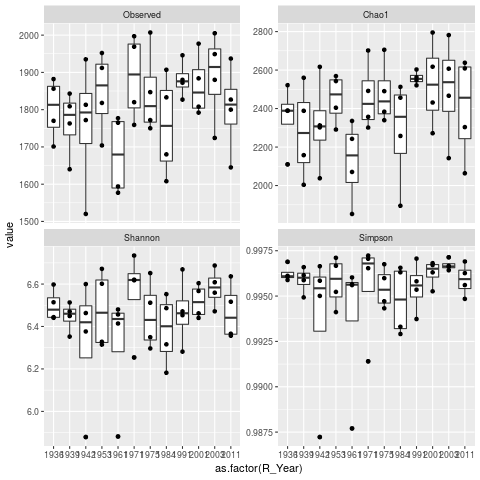

In [27]:
%%R
p.T2 = p$data %>% filter(TimePoint == "T2") 
ggplot(p.T2, aes(x = as.factor(R_Year), y = value)) +
geom_boxplot() +
geom_point()+
facet_wrap(~variable, ncol = 2, scales = "free_y")

In [28]:
%%R
#test library effects on microbial diversity
tmp = p.T2 %>% filter(variable == "Chao1")

fit1 = lmer(value~ R_Year.c + (1|Rep) + (1|Genotype), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print
# fit1 = lmer(value~ Genotype + (1|Rep) , data = tmp)
# anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print
rand(fit1) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
         Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
R_Year.c 109199  109199     1    10  3.6344 0.08571 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
       R2m        R2c 
0.07345048 0.45346680 
Analysis of Random effects Table:
         Chi.sq Chi.DF p.value   
Rep        8.96      1   0.003 **
Genotype   1.28      1   0.257   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [39]:
%%R
#test Genotype effects on microbial diversity
tmp = p.T2 %>% filter(variable == "Chao1")

fit1 = lmer(value~ Genotype + (1|Rep), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print
# fit1 = lmer(value~ Genotype + (1|Rep) , data = tmp)
# anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print
rand(fit1) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
         Sum Sq Mean Sq NumDF DenDF F.value  Pr(>F)  
Genotype 711963   64724    11    33  2.1542 0.04379 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
      R2m       R2c 
0.2502084 0.5037231 
Analysis of Random effects Table:
    Chi.sq Chi.DF p.value   
Rep   8.96      1   0.003 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


* There was an increase in estimated richness (Chao1) with year of release, but overall model explained low portion of variance

In [29]:
%%R
#test library effects on microbial diversity
tmp = p.T2 %>% filter(variable == "Shannon")

fit1 = lmer(value~ R_Year.c + (1|Rep) + (1|Genotype), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

# fit1 = lmer(value~ Genotype + (1|Rep), data = tmp)
# anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print
rand(fit1) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
           Sum Sq  Mean Sq NumDF DenDF F.value Pr(>F)
R_Year.c 0.044584 0.044584     1    10   1.676 0.2245
       R2m        R2c 
0.02931609 0.17791128 
Analysis of Random effects Table:
         Chi.sq Chi.DF p.value
Rep        2.63      1     0.1
Genotype   0.00      1     1.0


In [40]:
%%R
#test library effects on microbial diversity
tmp = p.T2 %>% filter(variable == "Shannon")

fit1 = lmer(value~ Genotype + (1|Rep), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

# fit1 = lmer(value~ Genotype + (1|Rep), data = tmp)
# anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print
rand(fit1) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
          Sum Sq  Mean Sq NumDF DenDF F.value Pr(>F)
Genotype 0.30213 0.027467    11    33  1.0227 0.4492
      R2m       R2c 
0.1688452 0.2945748 
Analysis of Random effects Table:
    Chi.sq Chi.DF p.value
Rep   2.47      1     0.1


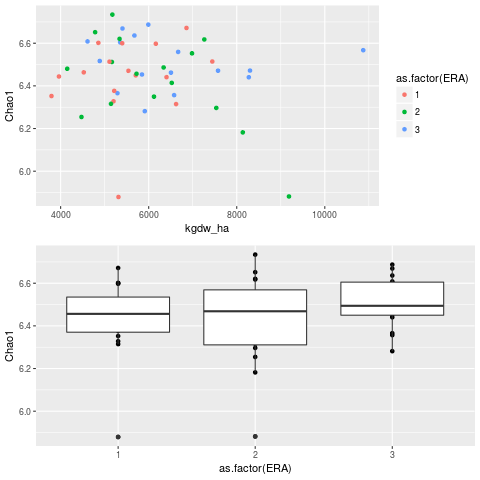

In [30]:
%%R
p1 = ggplot(tmp, aes(x = kgdw_ha, y = value, color = as.factor(ERA)))+
geom_point() +
ylab("Chao1") 

p2 = ggplot(tmp, aes(x = as.factor(ERA), y = value))+
geom_point() +
geom_boxplot() +
ylab("Chao1")

grid.arrange(p1, p2, ncol = 1)


## alpha at T3

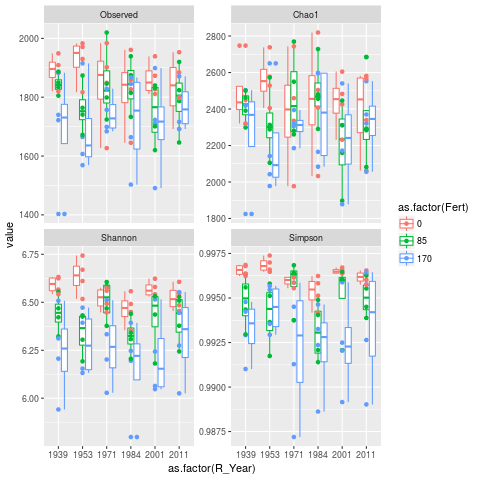

In [31]:
%%R
p.T3 = p$data %>% filter(TimePoint == "T3") 
ggplot(p.T3, aes(x = as.factor(R_Year), y = value, color = as.factor(Fert))) +
geom_boxplot() +
geom_point()+
facet_wrap(~variable, ncol = 2, scales = "free_y")

In [33]:
%%R
#test library effects on microbial diversity
tmp = p.T3 %>% filter(variable == "Chao1")

fit1 = lmer(value~ Fert*R_Year.c + (1|Rep) + (1|Pos) + (1|Pos:Fert) + (1|Genotype) + (1|Rep:Row:Pos), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print
rand(fit1) %>% print


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
              Sum Sq Mean Sq NumDF  DenDF F.value  Pr(>F)  
Fert          184693   92347     2 27.238  3.2927 0.05239 .
R_Year.c        1438    1438     1  3.621  0.0513 0.83307  
Fert:R_Year.c  38087   19043     2 41.225  0.6790 0.51270  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
       R2m        R2c 
0.08009423 0.58612786 
Analysis of Random effects Table:
              Chi.sq Chi.DF p.value    
Rep         1.33e+01      1   3e-04 ***
Pos         3.24e+00      1    0.07 .  
Pos:Fert    3.44e-01      1    0.56    
Genotype    1.14e-13      1    1.00    
Rep:Row:Pos 1.14e-13      1    1.00    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [41]:
%%R
#test Genotype effects on microbial diversity
tmp = p.T3 %>% filter(variable == "Chao1")

fit1 = lmer(value~ Fert*Genotype + (1|Rep) + (1|Pos) + (1|Pos:Fert) + (1|Rep:Row:Pos), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print
rand(fit1) %>% print


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
              Sum Sq Mean Sq NumDF  DenDF F.value Pr(>F)
Fert          203282  101641     2  4.221  3.4471 0.1296
Genotype       42409    8482     5 12.659  0.2877 0.9113
Fert:Genotype 217079   21708    10 32.349  0.7362 0.6856
      R2m       R2c 
0.1179596 0.6085488 
Analysis of Random effects Table:
              Chi.sq Chi.DF p.value   
Rep         9.84e+00      1   0.002 **
Pos         2.73e+00      1   0.098 . 
Pos:Fert    4.47e-01      1   0.504   
Rep:Row:Pos 2.27e-13      1   1.000   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [35]:
%%R
#test library effects on microbial diversity
tmp = p.T3 %>% filter(variable == "Shannon")

fit1 = lmer(value~ Fert*R_Year.c + (1|Rep) + (1|Pos) + (1|Pos:Fert)  + (1|Genotype) + (1|Rep:Row:Pos), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print
rand(fit1) %>% print


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq  Mean Sq NumDF  DenDF F.value   Pr(>F)   
Fert          0.263700 0.131850     2 23.069  7.1443 0.003848 **
R_Year.c      0.004558 0.004558     1  3.774  0.2470 0.646770   
Fert:R_Year.c 0.013048 0.006524     2 40.563  0.3535 0.704359   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
      R2m       R2c 
0.3934628 0.5103644 
Analysis of Random effects Table:
            Chi.sq Chi.DF p.value
Rep         0.0000      1     1.0
Pos         0.0000      1     1.0
Pos:Fert    1.4065      1     0.2
Genotype    0.1730      1     0.7
Rep:Row:Pos 0.0451      1     0.8


In [42]:
%%R
#test library effects on microbial diversity
tmp = p.T3 %>% filter(variable == "Shannon")

fit1 = lmer(value~ Fert*Genotype + (1|Rep) + (1|Pos) + (1|Pos:Fert)   + (1|Rep:Row:Pos), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print
rand(fit1) %>% print


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
               Sum Sq  Mean Sq NumDF  DenDF F.value  Pr(>F)  
Fert          0.45410 0.227049     2  4.537 11.6844 0.01623 *
Genotype      0.10628 0.021256     5 13.487  1.0939 0.40770  
Fert:Genotype 0.11088 0.011088    10 32.471  0.5706 0.82544  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
      R2m       R2c 
0.4295632 0.5288749 
Analysis of Random effects Table:
              Chi.sq Chi.DF p.value
Rep         1.48e-02      1     0.9
Pos         7.82e-14      1     1.0
Pos:Fert    1.74e+00      1     0.2
Rep:Row:Pos 3.44e-03      1     1.0


* R_Year seems to havea  significant effect on observed and estimated richness, but not diversity measures
* Should check other timepoints and fert effects next
* Check to see if richness or eveness is correlated with growth characteristic


# Graph alpha patterns

In [101]:
%%R
head(p$data)

       X.sampleID TubeID ExtractionPlate PooledDNAPlate Sample.Well.ID
1  ERA-T2_3-1d_85    425            ERA4              B             E5
2 ERA-T1_3-5c_170    213            ERA4              B             D3
3 ERA-T1_1-2b_170    125            ERA1              A             A1
4   ERA-T1_1-4b_0    144            ERA1              A             C4
5 ERA-T1_1-4a_170    141            ERA1              A             C2
6 ERA-T3_1-3c_170    566            ERA1              A             D4
  PrimerPlate Primer.Number Primer.Well.ID  X primerFwdLoc primerRevLoc
1           2            37             E5 NA          2-E          2-5
2           2            20             D3 NA          2-D          2-3
3           1             1             A1 NA          1-A          1-1
4           1            27             C4 NA          1-C          1-4
5           1            11             C2 NA          1-C          1-2
6           1            28             D4 NA          1-D          1-4

In [117]:
%%R
Time = c("T1", "T2", "T3")
Stage = c("V6", "R1", "R3")
dS = cbind(Time, Stage) %>% as.data.frame()
df = p$data %>%
    group_by(Genotype, Fert, R_Year, TimePoint, variable) %>%
    summarize(mValue = mean(value),
             seValue = sd(value)/sqrt(length(value)))  
df = left_join(df, dS, by = c("TimePoint" = "Time"))
df$Stage = factor(df$Stage, levels = c("V6", "R1", "R3"))
head(df)

Source: local data frame [6 x 8]
Groups: Genotype, Fert, R_Year, TimePoint [2]

  Genotype  Fert R_Year TimePoint variable       mValue      seValue  Stage
    <fctr> <int>  <int>    <fctr>   <fctr>        <dbl>        <dbl> <fctr>
1      322    85   1936        T2 Observed 1788.0000000 4.137028e+01     R1
2      322    85   1936        T2    Chao1 2270.5319714 7.591765e+01     R1
3      322    85   1936        T2  Shannon    6.5007564 3.716764e-02     R1
4      322    85   1936        T2  Simpson    0.9962788 2.057297e-04     R1
5      330     0   1939        T1 Observed 1872.5000000 6.650376e+01     V6
6      330     0   1939        T1    Chao1 2430.8549462 1.193803e+02     V6


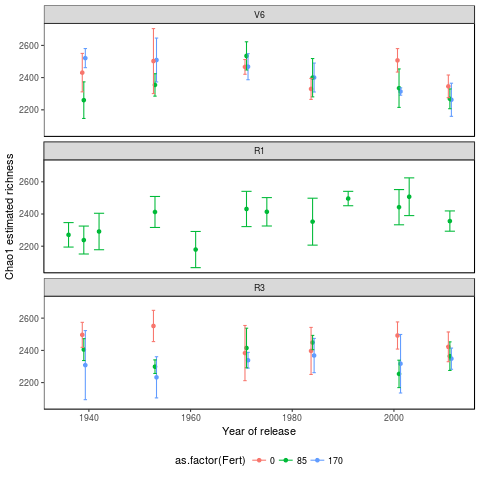

In [118]:
%%R

tmp = df %>% filter(variable == "Chao1") 
pC = ggplot(tmp, aes(x = R_Year, y = mValue, color = as.factor(Fert))) +
geom_point(position=position_dodge(width=0.9))+
geom_errorbar(aes(ymin = mValue - seValue, ymax = mValue + seValue), width = 2, position=position_dodge(width=0.9))+
theme_pub() +
facet_wrap(~Stage, ncol = 1)+
xlab("Year of release") +
ylab("Chao1 estimated richness") +
theme(legend.position = "bottom")
pC

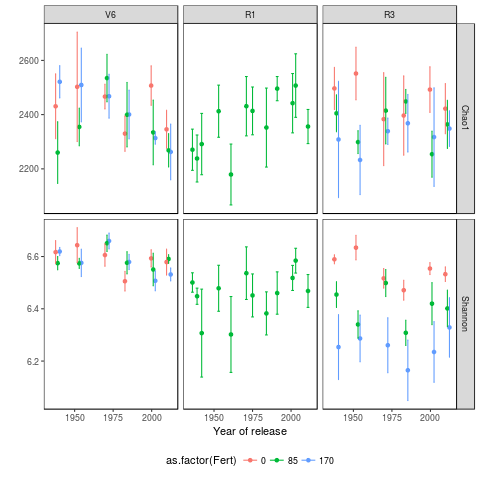

In [129]:
%%R

 tmp = df %>% filter(variable %in% c("Chao1", "Shannon")) 
pS = ggplot(tmp, aes(x = R_Year, y = mValue, color = as.factor(Fert))) +
geom_point(position=position_dodge(width=4))+
geom_errorbar(aes(ymin = mValue - seValue, ymax = mValue + seValue), position=position_dodge(width=4))+
theme_pub() +
facet_grid(variable~Stage, scales = "free_y")+
xlab("Year of release") +
ylab("")+
theme(legend.position = "bottom")
pS

# alpha diversity in seed treatments

In [30]:
%%R
phy.st = subset_samples(phy.r, Genotype %in% c("322", "3475", "34N42", "354") & TimePoint == "T2")
phy.st

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4592 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 47 sample variables ]
tax_table()   Taxonomy Table:    [ 4592 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4592 tips and 4591 internal nodes ]


In [31]:
%%R
alpha_meas = c("Observed", "Chao1", "Shannon", "Simpson")
p = plot_richness(phy.st, measures=alpha_meas)

p$data$Fert = as.factor(p$data$Fert)
p$data$R_Year.c = p$data$R_Year - 1935

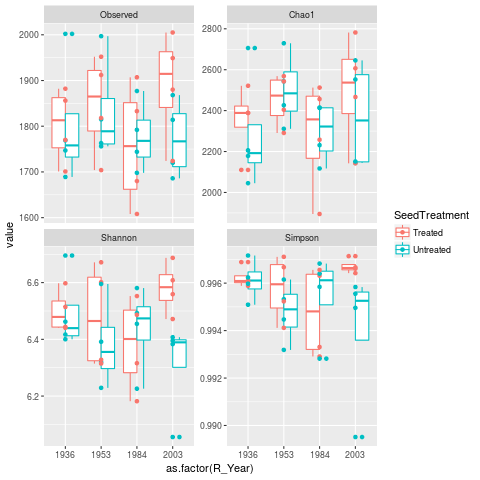

In [32]:
%%R

ggplot(p$data, aes(x = as.factor(R_Year), y = value, color = SeedTreatment)) +
geom_boxplot() +
geom_point()+
facet_wrap(~variable, ncol = 2, scales = "free_y")

In [33]:
%%R
#test library effects on microbial diversity
tmp = p$data %>% filter(variable == "Chao1")

fit1 = lmer(value~ Genotype*SeedTreatment + (1|Rep), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                       Sum Sq Mean Sq NumDF DenDF F.value Pr(>F)
Genotype               200138   66713     3    21 2.36366 0.1001
SeedTreatment            8436    8436     1    21 0.29888 0.5903
Genotype:SeedTreatment  38258   12753     3    21 0.45183 0.7187
      R2m       R2c 
0.1360827 0.5176216 


In [34]:
%%R
#test library effects on microbial diversity
tmp = p$data %>% filter(variable == "Chao1")

fit1 = lmer(value~ R_Year*SeedTreatment + (1|Rep), data = tmp)
anova(fit1, ddf="Kenward-Roger") %>% print

r.squaredGLMM(fit1) %>% print

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                     Sum Sq Mean Sq NumDF DenDF  F.value Pr(>F)
R_Year               3036.7  3036.7     1    25 0.092247 0.7639
SeedTreatment        4919.1  4919.1     1    25 0.149430 0.7024
R_Year:SeedTreatment 5092.3  5092.3     1    25 0.154691 0.6974
        R2m         R2c 
0.009681847 0.403539615 


* among the plants sampled in treated and untreated plots, there was no effect of seed treatment on Chao1 and no interaction between year of release and chao1
* There was also no interaction between genotype and seed treatment.  
* The positive trend was less evident in the untreated batch, 

*Similarly there was not an effect of seed treatment on Shannon's H and no interaction between seed treatment and year of release, or seed treatment and genotype.

## Graph seed treatments

In [197]:
%%R
head(p$data)

Source: local data frame [6 x 8]
Groups: Genotype, Fert, R_Year, TimePoint [3]

  Genotype   Fert R_Year TimePoint variable      mValue     seValue Stage
    <fctr> <fctr>  <int>    <fctr>   <fctr>       <dbl>       <dbl> <chr>
1      322     85   1936        T2    Chao1 2299.601108 72.67746406    R1
2      322     85   1936        T2  Shannon    6.496529  0.03628327    R1
3     3475     85   1984        T2    Chao1 2333.094263 69.86645130    R1
4     3475     85   1984        T2  Shannon    6.416202  0.05499397    R1
5    34N42     85   2003        T2    Chao1 2469.333361 86.13739419    R1
6    34N42     85   2003        T2  Shannon    6.449385  0.07037531    R1


In [200]:
%%R

df = p$data %>%
    group_by(Genotype, Fert, R_Year, TimePoint, SeedTreatment, variable) %>%
    summarize(mValue = mean(value),
             seValue = sd(value)/sqrt(length(value)))  %>%
    mutate(Stage = "R1")


head(df)

Source: local data frame [6 x 9]
Groups: Genotype, Fert, R_Year, TimePoint, SeedTreatment [2]

  Genotype   Fert R_Year TimePoint SeedTreatment variable       mValue
    <fctr> <fctr>  <int>    <fctr>        <fctr>   <fctr>        <dbl>
1      322     85   1936        T2       Treated Observed 1788.0000000
2      322     85   1936        T2       Treated    Chao1 2270.5319714
3      322     85   1936        T2       Treated  Shannon    6.5007564
4      322     85   1936        T2       Treated  Simpson    0.9962788
5      322     85   1936        T2     Untreated Observed 1803.7500000
6      322     85   1936        T2     Untreated    Chao1 2328.6702437
# ... with 2 more variables: seValue <dbl>, Stage <chr>


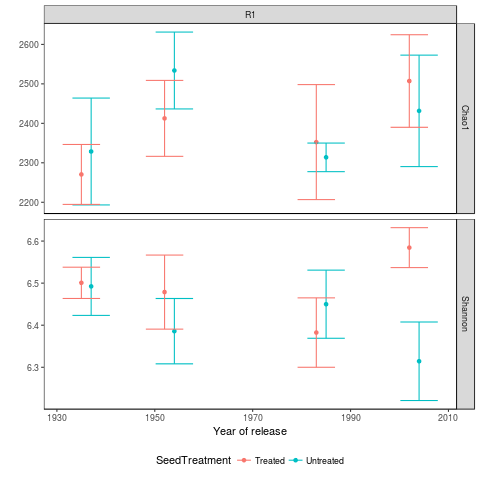

In [201]:
%%R
## Graph seed treatments

tmp = df %>% filter(variable %in% c("Chao1", "Shannon")) 
p = ggplot(tmp, aes(x = R_Year, y = mValue, color = SeedTreatment)) +
geom_point(position=position_dodge(width=4))+
geom_errorbar(aes(ymin = mValue - seValue, ymax = mValue + seValue), position=position_dodge(width=4))+
theme_pub() +
facet_grid(variable~Stage, scales = "free_y")+
xlab("Year of release") +
ylab("")+
theme(legend.position = "bottom")
p


In [ ]:

tmp = df %>% filter(variable %in% c("Chao1", "Shannon")) 
pS = ggplot(tmp, aes(x = R_Year, y = mValue, color = as.factor(Fert))) +
geom_point(position=position_dodge(width=4))+
geom_errorbar(aes(ymin = mValue - seValue, ymax = mValue + seValue), position=position_dodge(width=4))+
theme_pub() +
facet_grid(variable~Stage, scales = "free_y")+
xlab("Year of release") +
ylab("")+
theme(legend.position = "bottom")
pS